In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage

Carga de Datos y Verficación de Data

In [25]:
# Cargar el archivo clases.txt
clases = pd.read_csv('clase.txt', delimiter=',')
# print(clases_mat)

# Cargar el archivo datasettissue.txt
data = pd.read_csv('dataset_tissue.txt', delimiter=',')
data = data.T
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


In [26]:
#Escalamos la data para que todas la variables trabajen en la misma escala y la distancia que manejan los algoritmos no se confundan y den más peso a una variable que a otra.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_escaled = scaler.fit_transform(data.drop(['Unnamed: 0'], axis=0))
print(data_escaled.shape)
data_escaled

(189, 22215)


array([[-0.08394318, -0.26896386, -0.66877899, ...,  2.36828885,
        -0.7437041 , -1.39344865],
       [ 0.28756536,  2.07429885, -0.09167218, ...,  2.73742686,
        -1.00699415,  0.00883984],
       [ 0.01043577,  0.10346329, -0.23090376, ...,  0.53311048,
        -0.49675351, -0.80529805],
       ...,
       [-0.32557484,  2.14545647, -1.24354797, ...,  1.54408879,
        -0.70876003, -0.01674819],
       [-0.38022424,  2.57505219, -1.23471674, ...,  0.53784596,
        -0.21543834, -0.73030421],
       [ 0.05105073,  3.25188256, -0.7387927 , ...,  2.74923947,
        -0.75457855,  0.36275341]])

Redimensión de la matriz Data: PCA

In [27]:
data_escaled = pd.DataFrame(data_escaled, columns = data.drop(['Unnamed: 0'], axis=0).columns)
data_escaled

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
0,-0.083943,-0.268964,-0.668779,1.836119,0.183902,1.144708,-0.525237,1.277088,1.033676,-0.351941,...,1.338341,-0.166909,0.828491,-1.139245,-0.665002,-0.955105,-1.407406,2.368289,-0.743704,-1.393449
1,0.287565,2.074299,-0.091672,1.807112,-0.172736,1.288429,-0.390230,0.525843,0.388064,-0.421282,...,1.225911,0.640901,0.201143,-0.954946,0.599099,1.452954,-0.134776,2.737427,-1.006994,0.008840
2,0.010436,0.103463,-0.230904,1.176378,0.314095,0.433193,-0.084681,0.408431,-0.154288,-0.420558,...,0.395210,0.070961,-0.408139,-0.819826,-0.039924,-0.974209,-1.494359,0.533110,-0.496754,-0.805298
3,-0.011856,1.642102,1.145059,0.236698,0.597067,1.333722,0.115592,2.152655,1.690742,-0.378644,...,1.111321,3.787105,-0.414406,-0.173575,0.969717,-1.110335,-1.327514,1.126653,-0.280973,-0.291975
4,-0.123281,1.754861,0.508377,-0.172114,0.447274,0.504446,-0.005300,1.338514,2.145546,-0.329163,...,1.645145,1.679062,-0.854060,-0.534987,0.243687,-0.948821,-0.887871,0.133357,-0.568856,-0.952908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-0.536882,-0.204538,-0.599617,-1.717883,0.358223,-1.930362,-0.575114,1.646634,-0.888030,-0.351518,...,-1.858140,0.401334,0.843921,-1.530852,-3.282254,-1.377814,0.982946,1.000375,-0.739966,-0.653099
185,0.288002,0.821381,-0.631830,-1.726047,0.472506,-0.608386,-0.324405,3.003083,-0.602407,-0.380845,...,-1.981552,0.760694,0.661820,-2.868296,-0.143768,-0.978374,5.293264,2.524190,-0.914877,0.406577
186,-0.325575,2.145456,-1.243548,-2.567813,-1.313382,-0.002994,-0.895070,2.798034,-0.847356,-0.358077,...,1.990525,1.874757,2.286725,-1.694246,1.476619,0.440691,-0.310464,1.544089,-0.708760,-0.016748
187,-0.380224,2.575052,-1.234717,-2.268310,0.293952,-0.317577,-0.343294,-0.414350,-0.773412,-0.321507,...,0.554943,2.337215,2.166318,-2.071547,1.133469,-0.545976,1.449536,0.537846,-0.215438,-0.730304


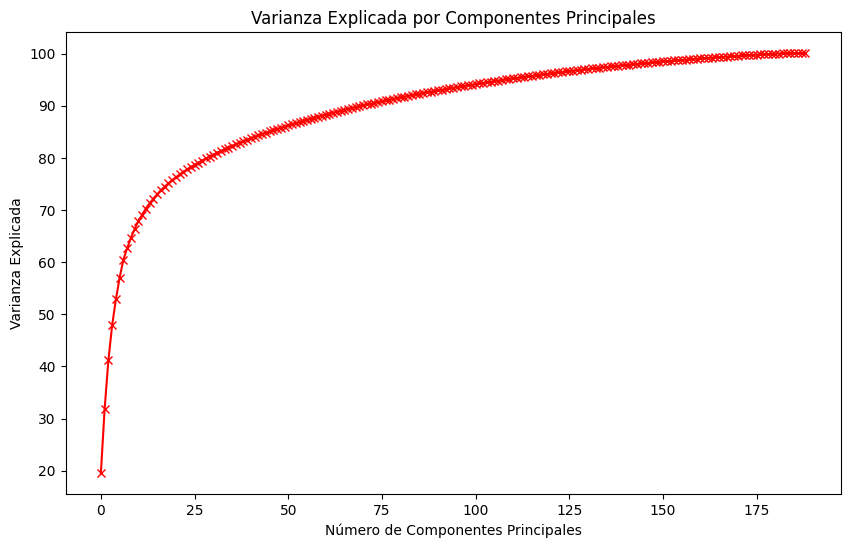

In [28]:
pca = PCA()
pca.fit(data_escaled)
pca_data_scaled = pca.transform(data_escaled)

explained_variance = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance,'r-x')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

In [29]:
#Como vemos basta con 75 componentes para explicar el 90% de la varianza de los datos.
pca_data_standard = pd.DataFrame(pca_data_scaled[:,0:75])
pca_data_standard = pca_data_standard.values

K-Means

In [30]:
def Init_Centroide(data, k):#Implementación k++ para inicializar los centroides
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [31]:
def get_cluster(data, centroides):
    distancias = np.linalg.norm(data[:, np.newaxis, :] - centroides, axis=2)
    clusters = np.argmin(distancias, axis=1)
    return clusters

In [32]:
def return_new_centroide(grupos, data, k):
    new_centroides = np.zeros((k, data.shape[1]))#Matriz de ceros de k filas y n columnas en donde irán los nuevos centroides
    for i in range(k):
        cluster_points = data[grupos == i]
        if cluster_points.size > 0:
            new_centroides[i] = np.mean(cluster_points, axis=0)
    return new_centroides

In [33]:
def distancia_promedio_centroides(old_centroide, new_centroide):
    distancias = [np.linalg.norm(old - new) for old, new in zip(old_centroide, new_centroide)]

    distancia_promedio = np.mean(distancias)

    return distancia_promedio

In [34]:
def kmeans(data, k, umbral):
    centroides = Init_Centroide(data, k)
    clusters = get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    # print("old", centroides)
    # print("new", new_centroides)
    while distancia_promedio_centroides(centroides, new_centroides) > umbral:
        # print("CENTROIDES", centroides, distancia_promedio_centroides(centroides, new_centroides))
        centroides = new_centroides
        clusters = get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)

    return new_centroides, clusters

Encontrando el K óptimo

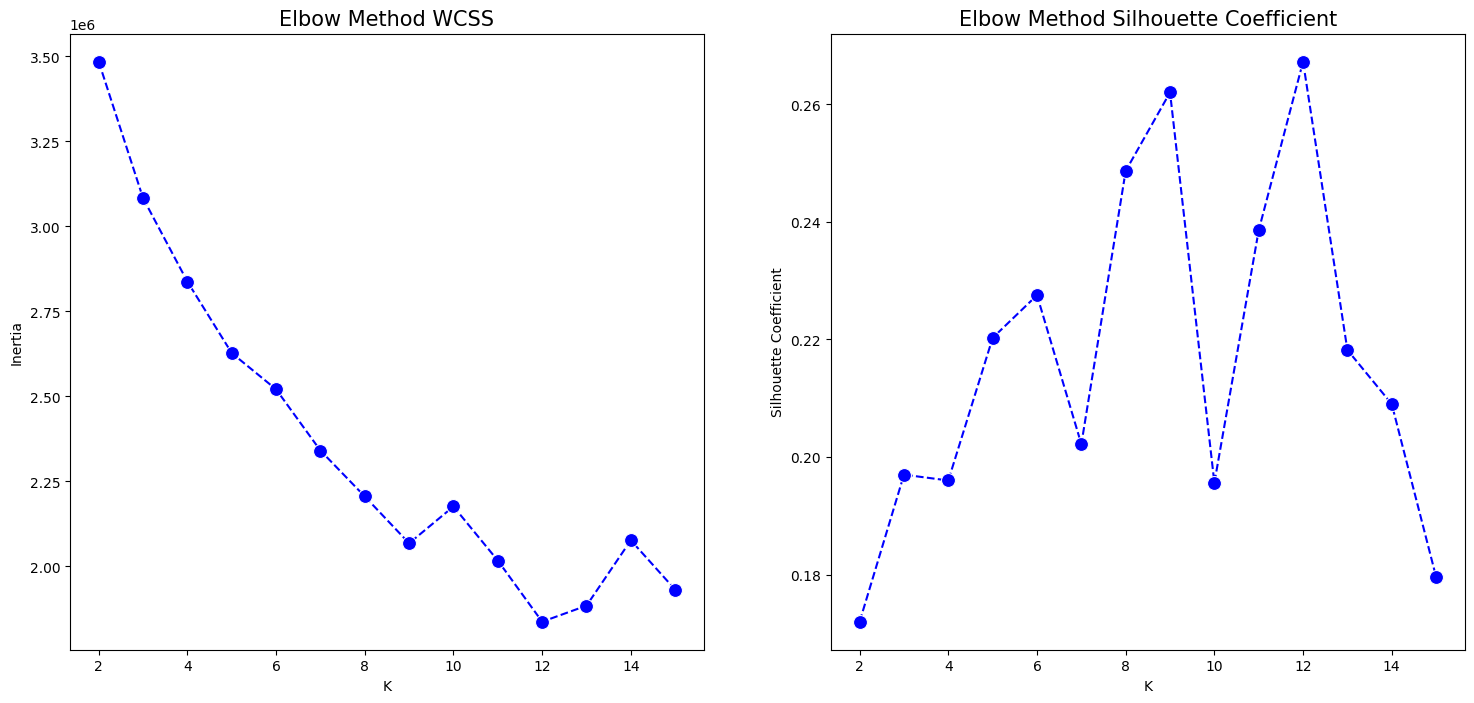

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def distance(v1, v2):
    return np.linalg.norm(v1 - v2)

def suma_cuadrados_distancias(data, centroides, clusters):
    distances = np.sum((data - centroides[clusters])**2, axis=1)
    return np.sum(distances)

def silhouette(data, clusters):
    n = len(data)
    a = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        cluster_i = clusters[i]
        cluster_points_i = data[clusters == cluster_i]
        a[i] = np.mean(np.linalg.norm(data[i] - cluster_points_i, axis=1))

        min_b = np.inf
        for j in range(n):
            if clusters[j] != cluster_i:
                cluster_points_j = data[clusters == clusters[j]]
                dist = np.mean(np.linalg.norm(data[i] - cluster_points_j, axis=1))
                min_b = min(min_b, dist)
        b[i] = min_b

    silhouette_values = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_values)

def metricas(data, max_k, umbral):
    distancias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        centroides, clusters = kmeans(data, k, umbral)
        suma_distancias = suma_cuadrados_distancias(data, centroides, clusters)
        silhouette_value = silhouette(data, clusters)
        distancias.append(suma_distancias)
        silhouettes.append(silhouette_value)

    return distancias, silhouettes

umbral = 4.5
max_k = 15
K = range(2, max_k + 1)

distancias, silhouette_scores = metricas(pca_data_scaled, max_k, umbral)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for i, (values, title) in enumerate([(distancias, 'Elbow Method WCSS'), (silhouette_scores, 'Elbow Method Silhouette Coefficient')]):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inertia' if i == 0 else 'Silhouette Coefficient')
    axes[i].set_title(title, size=15)

plt.show()
# Inicializar listas para almacenar las métricas

In [36]:
k=12
km = KMeans(n_clusters=k)
y_km = km.fit_predict(pca_data_scaled)
print(y_km)
print(silhouette_score(pca_data_scaled, y_km))

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11  3  3  3  3  3  3  3  3  3  3  3  3  7  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  7  7  7  0  0  0  7  7  7  0  0  0  7  7 11  2  0  0  0  0  0  0  6  6
  6  6  6  6  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  0  0  0  0  0
  0  0  0  0  0  0  0  4  4  4  4  4 11 11 11  9  9  9 10 10 10]
0.24134166489379857


d:\Proyectos_2023\Machine_Learning\Proyecto_2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
new_centroides, clusters = kmeans(pca_data_scaled, k, umbral)
print("CLUSTERS", clusters)
print(silhouette(pca_data_scaled, clusters))

#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
data_complete = pd.DataFrame(data)
data_complete = data_complete[1:]
data.columns = data_column
data_complete['cluster'] = clusters


CLUSTERS [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  2  2  2  2  2  2  2  2
  2  2  2  9  9  9  9  2  2  9  2  2  2  2  2  2  2  9  2  2  2  2  3  3
  3 11  3  3 11  3 11 11 11 11  3 11 11 11 11 11 11 11 11 11  3 11 11 11
 11 10  0  0 10  0  0  0 10 10  0  0  0 10  6  6  6  6  6  6  7  7  7  7
  7  7  7  6  6  7  6  7  7  6  7  7  7  6  6  7  6  6  7  6  6  6  6  6
 10 10 10  1  1  1 10 10 10  1  1  1 10 10  3  9  1  1  1  1  8  8  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  8  8  8  1  8
  8  1  8  1  1  8  8  0  0  0  0  0 11 11 11  0  0  0  0  8  8]
0.15592910220037012


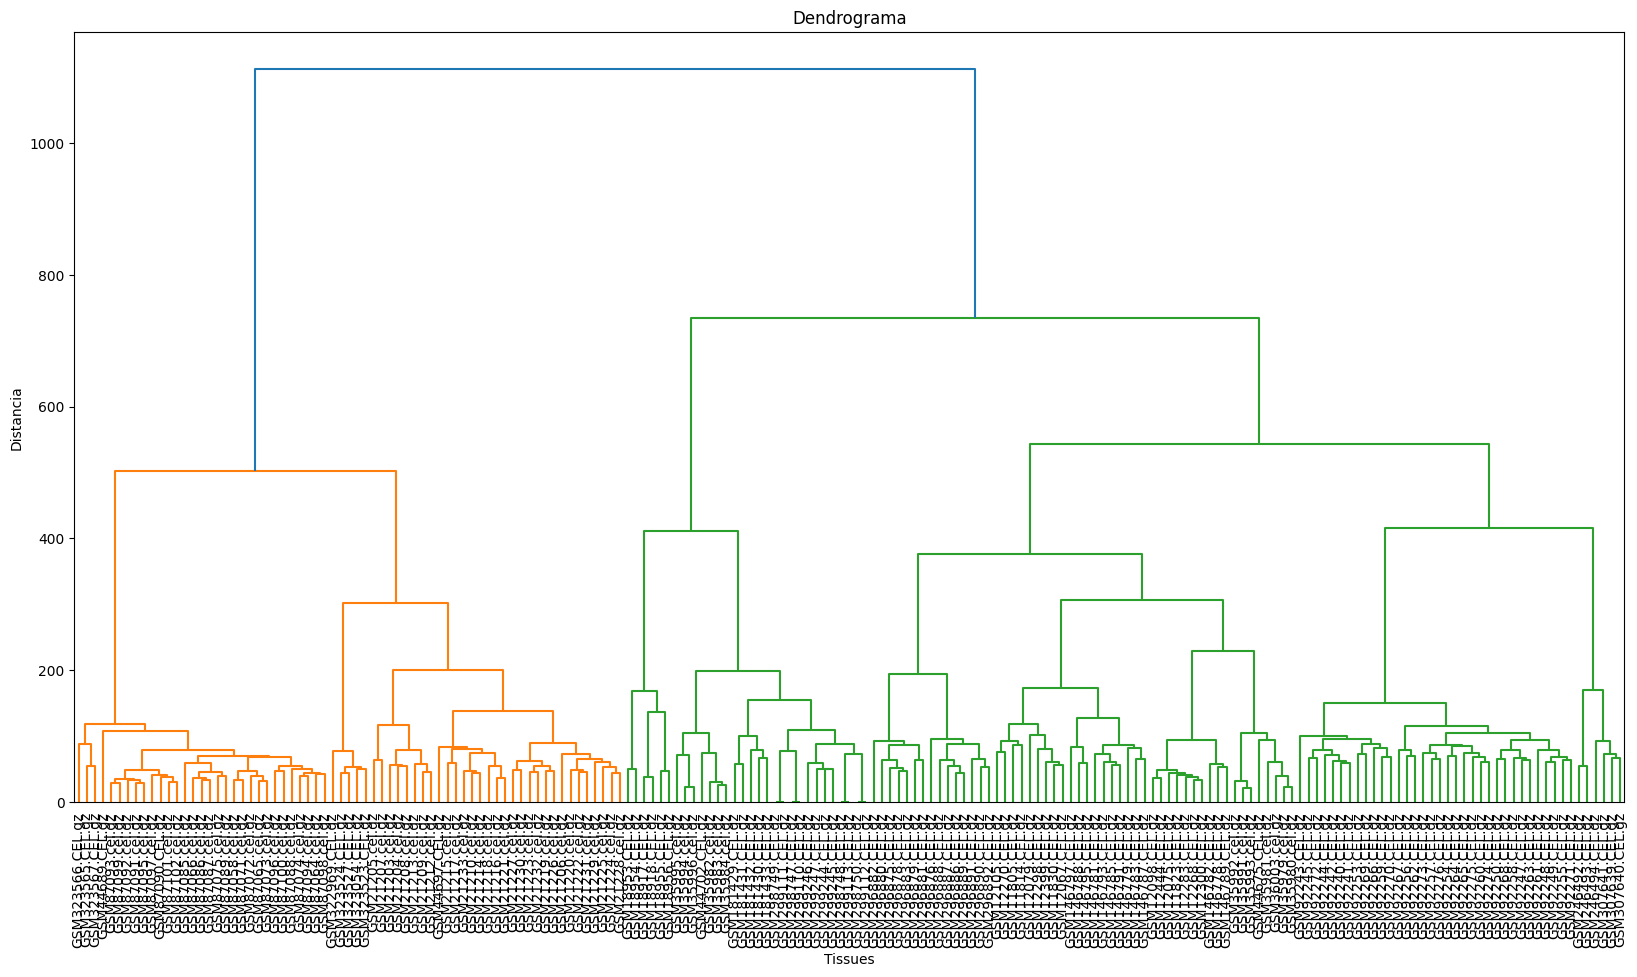

In [38]:
fig = plt.figure(figsize=(20, 10))
dendrogram(linkage(data_complete, method='ward'), labels=data_complete.index, leaf_font_size=10)
plt.title('Dendrograma')
plt.xlabel('Tissues')
plt.ylabel('Distancia')
plt.show()